# Сипаков Вячеслав Всеволодович (Вариант 8)

## Astronauts.csv

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('!data/8_astronauts/astronauts.csv')
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


#### 1. Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе, постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.

In [16]:
df[df['Space Walks (hr)'].max() == df['Space Walks (hr)']]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
203,Michael E. Lopez-Alegria,1992.0,14.0,Retired,5/30/1958,"Madrid, Spain",Male,US Naval Academy; US Naval Postgraduate School,Systems Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,6190,10,67.0,"STS-73 (Columbia), STS-92 (Discovery), STS-113...",NaN,NaN


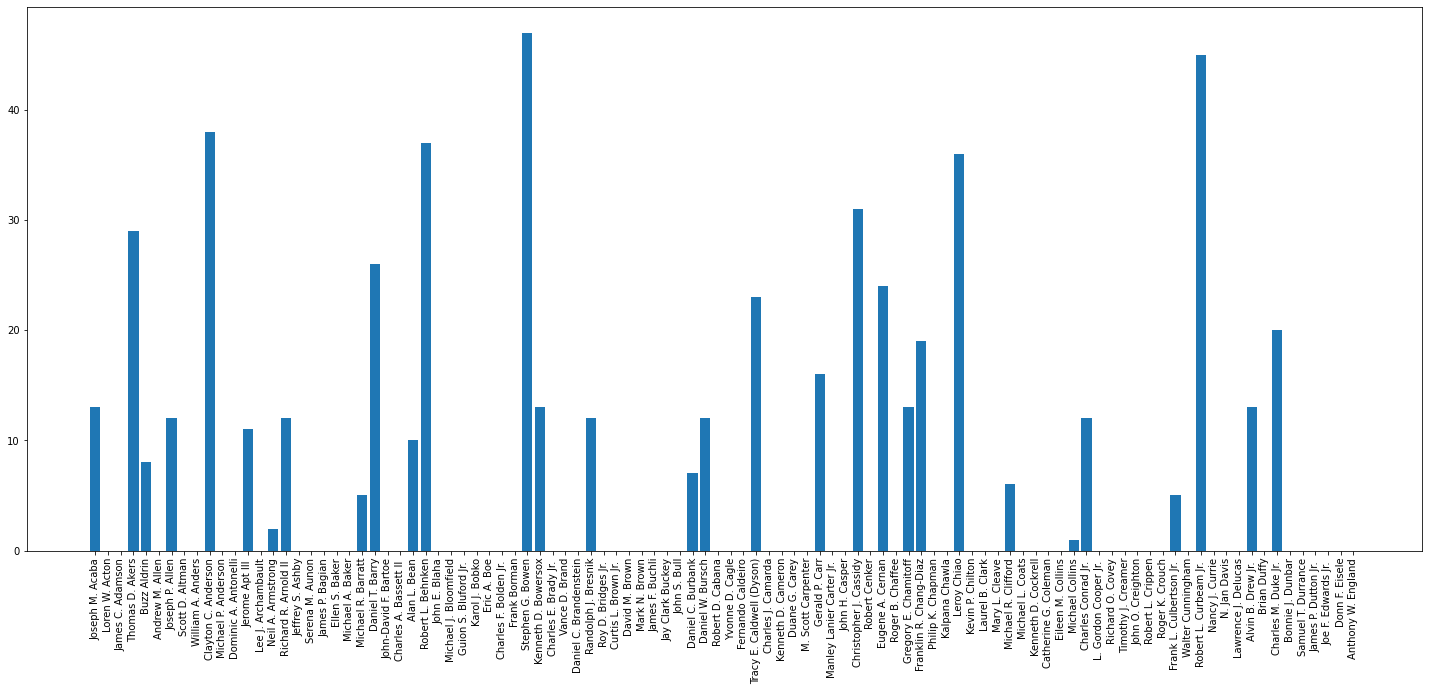

In [17]:
plt.rcParams["figure.figsize"]= 25,10
plt.bar(df.head(100)['Name'], df.head(100)['Space Walks (hr)'], align='center')
plt.xticks(rotation=90)
plt.show()

#### 2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.

In [24]:
df['Alma Mater'].str.split('; ', expand=True).stack().value_counts().idxmax()

'US Naval Academy'

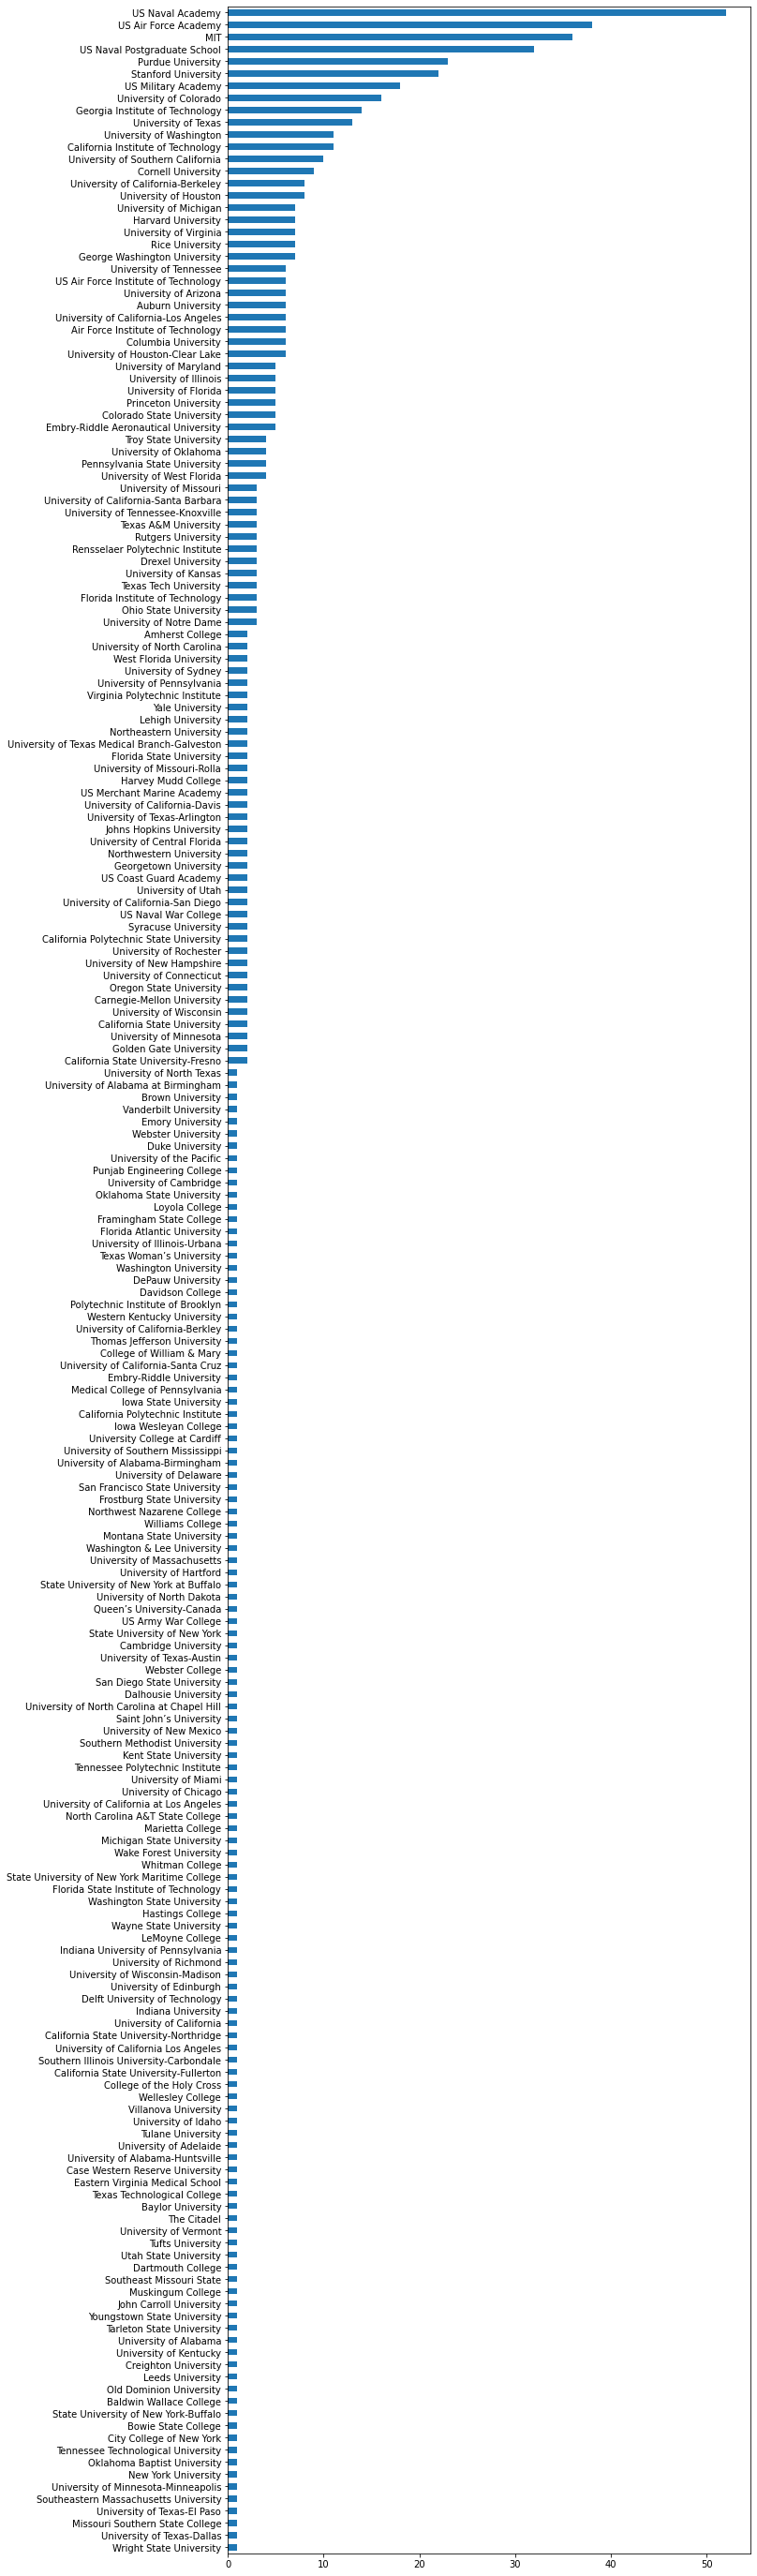

In [19]:
ax = df['Alma Mater'].str.split('; ', expand=True).stack().value_counts().plot(kind = 'barh', figsize = (10, 50))
ax.invert_yaxis()

#### 3. Определите количество военных и гражданских астронавтов.

In [26]:
pd.Series({'Military astronauts' : df['Military Rank'].count(),'Civil astronauts' : df[df['Military Rank'].isnull()]['Name'].count()})

Military astronauts    207
Civil astronauts       150
dtype: int64

#### 4. Определите наиболее часто встречающееся среди астронавтов военное звание.

In [33]:
ranks = df.groupby('Military Rank')['Name'].count()
print(ranks[ranks == ranks.max()])

Military Rank
Colonel    94
Name: Name, dtype: int64


#### 5. Определите количество женщин среди астронавтов

In [22]:
df.groupby('Gender')['Name'].count()

Gender
Female     50
Male      307
Name: Name, dtype: int64

#### 6. Удалите из набора данных астронавтов, для которых не указан бакалавриат. Выведите размер набора данных до и после удаления.

In [9]:
before = df['Name'].count()
df = df[df['Undergraduate Major'].notnull()]
after = df['Name'].count()
print(before, ' -> ', after)

357  ->  335


#### 7. Определите количество астронавтов, родом из Техаса.

In [10]:
df[df['Birth Place'].str.contains('TX')]['Name'].count()

18

#### 8. Определите количество миссий, в ходе выполнений которых погибли астронавты.

In [34]:
df['Death Mission'].drop_duplicates().count()

3

#### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [35]:
def missions_count(m):
    return m.split(', ').__len__()

def gender(g):
    if g == 'Female': 
        return 0
    else:
        return 1

print(df['Name'].count())
df_copy = df.dropna(subset=['Gender', 'Missions'])
print(df_copy['Name'].count())

#print(df_copy)
#print(df_copy['Missions'])
df_genders = df_copy['Gender'].apply(lambda g: gender(g))
df_missions = df_copy['Missions'].apply(lambda m: missions_count(m))
#print(df_missions)

corr_pearson, pval_pearson = stats.pearsonr(df_genders, df_missions)
print('Pearson:')
print('Correlation = ', corr_pearson)
print('P-value = ', pval_pearson)

corr_spearman, pval_spearman = stats.spearmanr(df_genders, df_missions)
print('\nSpearman:')
print('Correlation = ', corr_spearman)
print('P-value = ', pval_spearman)

357
334
Pearson:
Correlation =  -0.022797969624393077
P-value =  0.678039376618327

Spearman:
Correlation =  -0.02411924245940919
P-value =  0.6605118347241736


Как видим, корреляция Спирмена немного больше по модулю

Корреляция отрицательна и незначительна по модулю => нет зависимости количества миссий от пола

P-значение большое => высока вероятность, что различия в количестве миссий у астронавтов разных полов случайны

<AxesSubplot:>

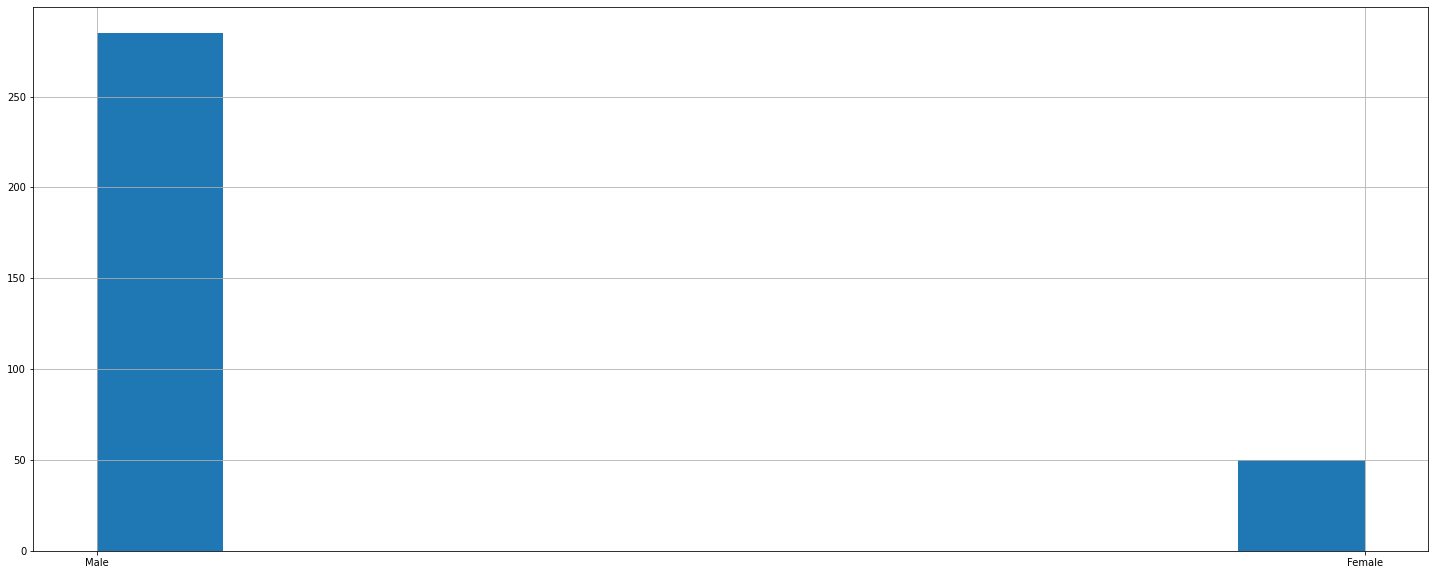

In [13]:
df['Gender'].hist()

<AxesSubplot:>

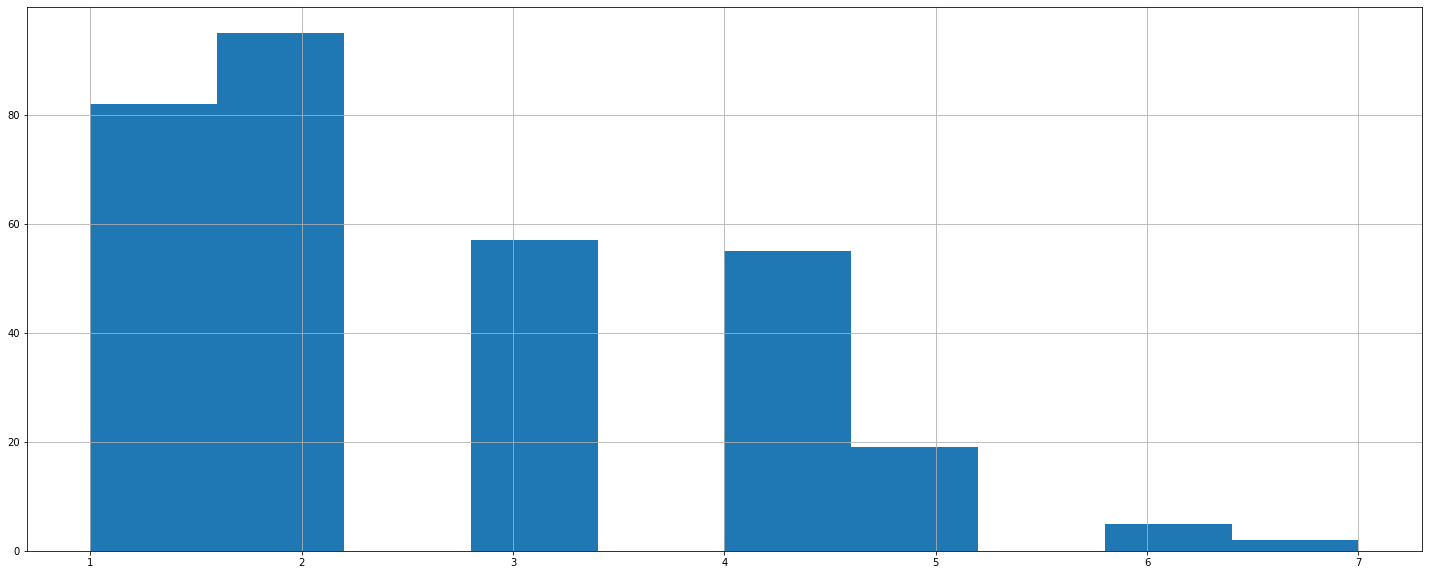

In [14]:
df_missions.hist()